In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("tickets.csv")
df.head(2)

,ticket_id,client,service,logged_date,status,time_spent,assignee,logger
0,1000,A,A1,2024-02-10 19:41:00 UTC,closed,5,member1,user1
1,1001,D,B1,2024-06-03 04:22:00 UTC,closed,5,member3,user3


In [24]:
# Convert logged_date to datetime
df["logged_date"] = pd.to_datetime(df["logged_date"], format="%Y-%m-%d %H:%M:%S UTC")

In [25]:
# 1. Basic Statistics
print("Basic Statistics")
print(df.describe(include="all"))

Basic Statistics
          ticket_id client service                    logged_date  status  \
count   1000.000000   1000    1000                           1000    1000   
unique          NaN      5       6                            NaN       3   
top             NaN      B      D1                            NaN  closed   
freq            NaN    216     187                            NaN     338   
mean    1499.500000    NaN     NaN  2024-05-30 21:00:58.679999744     NaN   
min     1000.000000    NaN     NaN            2024-01-01 00:01:00     NaN   
25%     1249.750000    NaN     NaN            2024-03-18 01:27:45     NaN   
50%     1499.500000    NaN     NaN            2024-05-31 17:18:00     NaN   
75%     1749.250000    NaN     NaN            2024-08-13 14:23:00     NaN   
max     1999.000000    NaN     NaN            2024-10-26 23:08:00     NaN   
std      288.819436    NaN     NaN                            NaN     NaN   

         time_spent assignee logger  
count   1000.000000 

In [26]:
# 2. Ticket Distribution by Client
client_dist = df["client"].value_counts()
print("\nTicket Distribution by Client")
print(client_dist)


Ticket Distribution by Client
client
B    216
C    214
A    205
E    190
D    175
Name: count, dtype: int64


In [27]:
# 3. Service Usage Analysis
service_usage = df["service"].value_counts()
print("\nService Usage Analysis")
print(service_usage)


Service Usage Analysis
service
D1    187
E1    168
B1    166
F1    165
A1    161
C1    153
Name: count, dtype: int64


In [28]:
# 4. Status Distribution
status_dist = df["status"].value_counts()
print("\nStatus Distribution")
print(status_dist)


Status Distribution
status
closed               338
awaiting_response    338
assigned             324
Name: count, dtype: int64


In [29]:
# 5. Time Spent Analysis
print("\nTotal Time Spent on Tickets")
print(df["time_spent"].sum())


Total Time Spent on Tickets
4488


In [30]:
print("\nAverage Time Spent per Ticket")
print(df["time_spent"].mean())


Average Time Spent per Ticket
4.488


In [31]:
# 6. Assignee Workload
assignee_workload = df["assignee"].value_counts()
print("\nAssignee Workload")
print(assignee_workload)


Assignee Workload
assignee
member2    260
member4    259
member1    243
member3    238
Name: count, dtype: int64


In [32]:
# 7. Monthly Ticket Trend
df["month_year"] = df["logged_date"].dt.to_period("M")
monthly_trend = df["month_year"].value_counts().sort_index()
print("\nMonthly Ticket Trend")
print(monthly_trend)


Monthly Ticket Trend
month_year
2024-01     98
2024-02     98
2024-03     97
2024-04    102
2024-05    107
2024-06     89
2024-07    111
2024-08    123
2024-09     97
2024-10     78
Freq: M, Name: count, dtype: int64


In [33]:
# 8. Logger Contribution
logger_contribution = df["logger"].value_counts()
print("\nLogger Contribution")
print(logger_contribution)


Logger Contribution
logger
user3    269
user2    254
user4    240
user1    237
Name: count, dtype: int64


In [34]:
# 9. Ticket Distribution by Status and Client
status_client_dist = df.groupby(["status", "client"]).size().unstack(fill_value=0)
print("\nTicket Distribution by Status and Client")
print(status_client_dist)


Ticket Distribution by Status and Client
client              A   B   C   D   E
status                               
assigned           71  67  69  58  59
awaiting_response  70  70  69  60  69
closed             64  79  76  57  62


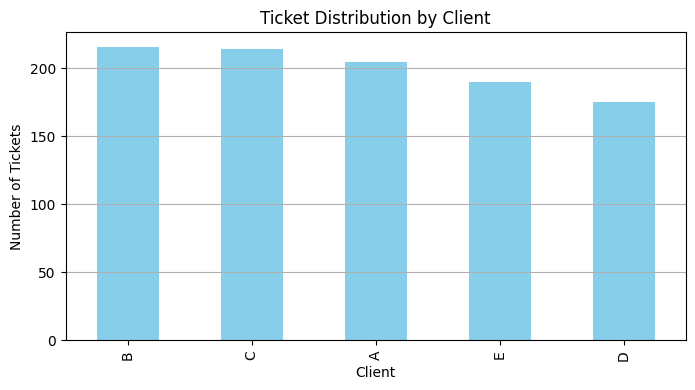

In [35]:
# Visualization: Ticket Distribution by Client
plt.figure(figsize=(8, 4))
client_dist.plot(kind="bar", title="Ticket Distribution by Client", color="skyblue")
plt.xlabel("Client")
plt.ylabel("Number of Tickets")
plt.grid(axis="y")
plt.show()

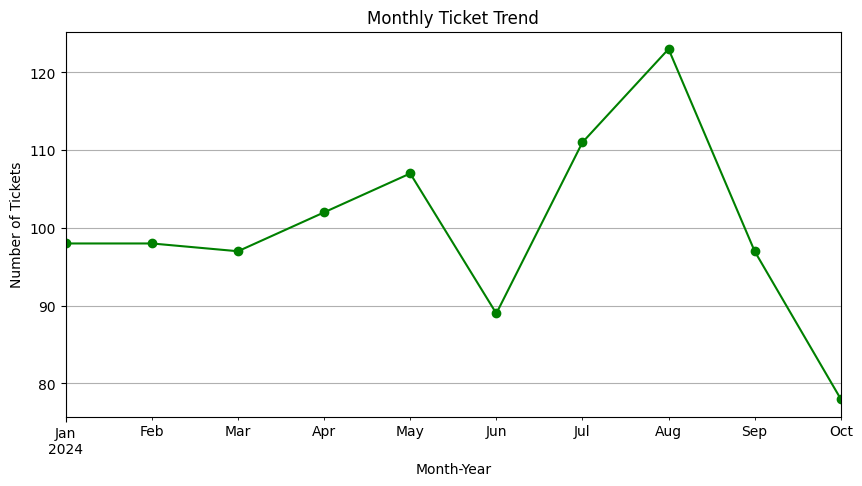

In [36]:
# Visualization: Monthly Ticket Trend
plt.figure(figsize=(10, 5))
monthly_trend.plot(kind="line", marker="o", title="Monthly Ticket Trend", color="green")
plt.xlabel("Month-Year")
plt.ylabel("Number of Tickets")
plt.grid()
plt.show()